## Observations

- The Capumolin treatment was very effective in reducing tumor size. For mouse 's185', tumor size decreased from 45.00(mm3) to 23.35(mm3) in a 45 day timespan. (shown in line plot)


- With a correlation coefficient of 0.84, there is a strong postive correlation between weight and tumor volume. Heavier mice have larger tumor volumes. (shown in scatter plot)


- Capomulin and Ramicane are more effective at reducing tumor volumes compared to Infubinol and Ceftamin. Capomulin and Ramicane final tumor volumes were overall smaller (by volume) than Infubinol and Ceftamin. (shown in box plot)

In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#path to csv files and merge
mouse_metadata = pd.read_csv("../Resources/Mouse_metadata.csv")
study_results = pd.read_csv("../Resources/Study_results.csv")
mouse_study = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#display number of unique mice IDs
mouse_study["Mouse ID"].nunique()

249

In [4]:
#check for any mouse ID with duplicate time points
duplicates = mouse_study.loc[mouse_study.duplicated(["Mouse ID","Timepoint"]), :]
duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
#display the data associated with duplicate mouse ID
new_index = mouse_study.set_index("Mouse ID")
new_index.loc["g989", :]

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
#create a new DataFrame where this data is removed
remove_dup = new_index.drop(["g989"])

In [7]:
#display new number of unique mouse IDs
clean_df = remove_dup.reset_index()
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
#display summary statistics for each drug regimen's tumor volume
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": std,
    "SEM": SEM
})

summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Charts and Pie Charts

In [9]:
#create bar chart to show the total number of time points for all mice tested for each drug regimen throughout the study
#using PANDAS(DataFrame.plot())
points_df = clean_df.groupby("Drug Regimen")["Timepoint"].count()
points_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

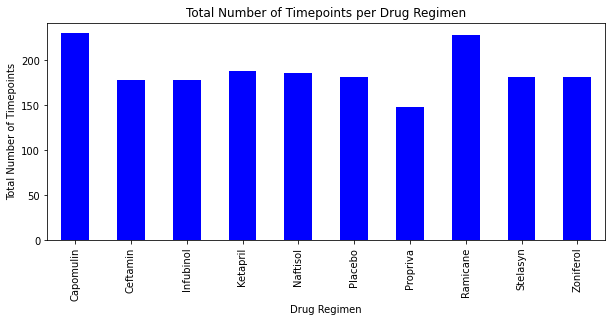

In [10]:
points_df.plot(kind="bar", facecolor="blue", figsize=(10,4), title="Total Number of Timepoints per Drug Regimen")

plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.show()

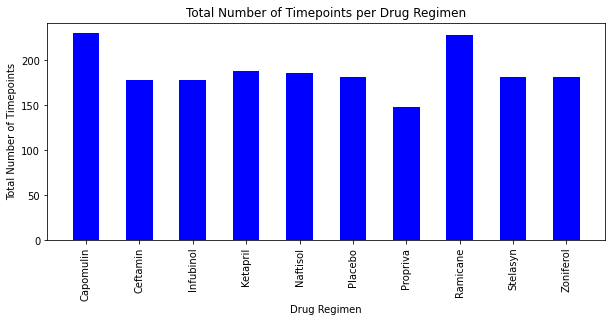

In [11]:
#create bar chart to show the total number of time points for all mice tested for each drug regimen throughout the study
#using Matplotlib(pyplot)
x_axis = points_df.index
tick_locations = [x for x in x_axis]

plt.figure(figsize=(10,4))
plt.bar(x_axis, points_df, width=0.5, color="b", align="center")
plt.xticks(tick_locations,x_axis, rotation="vertical")
plt.title("Total Number of Timepoints per Drug Regimen") 
plt.xlabel("Drug Regimen") 
plt.ylabel("Total Number of Timepoints")
plt.show()

In [12]:
#create pie chart to show distribution of female vs male mice
#using PANDAS(DataFrame.plot())
sex_df= clean_df["Sex"].value_counts()
sex_df

Male      958
Female    922
Name: Sex, dtype: int64

Text(0, 0.5, '')

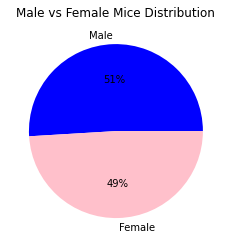

In [13]:
sex_df.plot(kind="pie", autopct="%1.0f%%", 
            colors=["blue", "pink"], title="Male vs Female Mice Distribution")

plt.ylabel(None)


Text(0.5, 1.0, 'Male vs Female Mice Distribution')

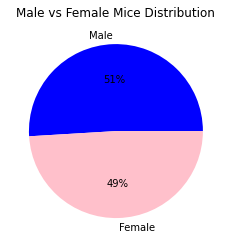

In [14]:
#create pie chart to show distribution of female vs male mice
#using Matplotlib(pyplot)
colors = ["blue", "pink"]
plt.pie(sex_df, labels=sex_df.index,colors=colors, autopct="%1.0f%%")
plt.title("Male vs Female Mice Distribution")

## Quartiles, Outliers, and Box Plots

In [15]:
#create a grouped DataFrame that shows the last (greatest) time point for each mouse
last_point = clean_df.groupby("Mouse ID")["Timepoint"].max()
greatest =pd.DataFrame(last_point)
greatest_df = greatest.reset_index()
greatest_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:
#merge this grouped DataFrame with the original cleaned DataFrame
new_point = pd.merge(clean_df, greatest_df, on=("Mouse ID", "Timepoint"), how="right")
new_point.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [17]:
#create a list that holds the treatment names and empty list to hold the tumor volume data.
treatment_name = ["Capomulin", "Ramicane","Infubinol", "Ceftamin"]
tumor_volume = []

#loop through each treatment in treatment list appending final tumor volumes to empty tumor list
for treatment in treatment_name:
    treatment_df = new_point.loc[new_point['Drug Regimen'] == treatment]
    volume = treatment_df['Tumor Volume (mm3)']
    tumor_volume.append(volume)
    
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers_count = (volume.loc[(treatment_df["Tumor Volume (mm3)"] >= upper_bound) | (treatment_df["Tumor Volume (mm3)"]<= lower_bound)]).count()
    outliers = (volume.loc[(treatment_df["Tumor Volume (mm3)"] >= upper_bound) | (treatment_df["Tumor Volume (mm3)"]<= lower_bound)]).unique()
    
    
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"{treatment}: Values below {lower_bound} could be outliers.")
    print(f"{treatment}: Values above {upper_bound} could be outliers.")
    print(f"{treatment} has {outliers_count} outliers: {outliers}")
    print("---------------------------------------------------------------")

The interquartile range of Capomulin is: 7.781863460000004
Capomulin: Values below 20.70456164999999 could be outliers.
Capomulin: Values above 51.83201549 could be outliers.
Capomulin has 0 outliers: []
---------------------------------------------------------------
The interquartile range of Ramicane is: 9.098536719999998
Ramicane: Values below 17.912664470000003 could be outliers.
Ramicane: Values above 54.30681135 could be outliers.
Ramicane has 0 outliers: []
---------------------------------------------------------------
The interquartile range of Infubinol is: 11.477135160000003
Infubinol: Values below 36.83290494999999 could be outliers.
Infubinol: Values above 82.74144559000001 could be outliers.
Infubinol has 1 outliers: [36.3213458]
---------------------------------------------------------------
The interquartile range of Ceftamin is: 15.577752179999997
Ceftamin: Values below 25.355449580000002 could be outliers.
Ceftamin: Values above 87.66645829999999 could be outliers.
Ce

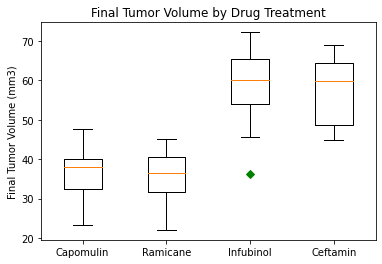

In [18]:
plt.boxplot(tumor_volume, 0, "gD")
plt.title("Final Tumor Volume by Drug Treatment")
plt.xticks([1, 2, 3, 4], treatment_name)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plot

In [19]:
#create line plot to show the tumor volume vs. time point for one mouse treated with Capomulin
#using Mouse ID "s185"
cap_line = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
mouse_info = cap_line.loc[cap_line["Mouse ID"] == "s185"]
mouse_info


,Mouse ID,Timepoint,Tumor Volume (mm3)
10,s185,0,45.000000
11,s185,5,43.878496
12,s185,10,37.614948
13,s185,15,38.177232
14,s185,20,36.866876
15,s185,25,33.949940
16,s185,30,32.959671
17,s185,35,28.328531
18,s185,40,25.472143
19,s185,45,23.343598


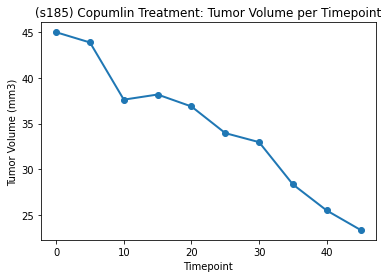

In [20]:
plt.plot(mouse_info["Timepoint"], mouse_info["Tumor Volume (mm3)"],marker="o", linewidth=2)
plt.title("(s185) Copumlin Treatment: Tumor Volume per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [21]:
#create a scatter plot of average tumor volume versus mouse weight for the Capomulin treatment regimen
cap_scatter = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_cap = cap_scatter.groupby("Mouse ID").mean()
avg_cap

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


Text(0, 0.5, 'Average Tumor Volume (mm3)')

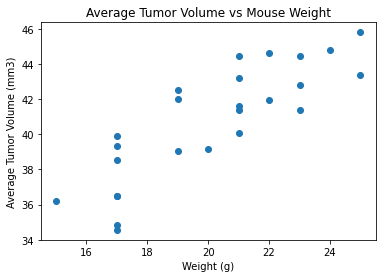

In [22]:
plt.scatter(avg_cap["Weight (g)"],avg_cap["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [23]:
#calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment
correlation = st.pearsonr(avg_cap["Weight (g)"], avg_cap["Tumor Volume (mm3)"])

print(f"The correlation between Weight and Tumor Volume is {round(correlation[0],2)}")

The correlation between Weight and Tumor Volume is 0.84


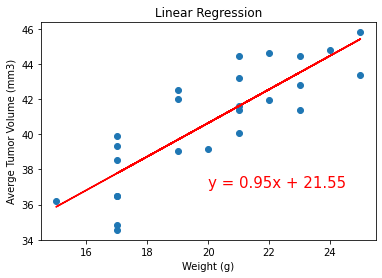

In [24]:
x_values = avg_cap["Weight (g)"]
y_values = avg_cap["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values, )
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.title("Linear Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Averge Tumor Volume (mm3)")
plt.show()